Keras Simple MNIST convnet
https://keras.io/examples/vision/mnist_convnet/

In [ ]:
# Part 1 - Data Processing

# importing the libraries
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt # for visualising mnist digits
import seaborn as sns
import pandas as pd

In [ ]:
# Importing data set from keras https://keras.io/api/datasets/mnist/
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images


# Model parameters
input_shape = (28,28) # one channel because of gray scale
num_classes = 10 # 0-9 digits to predict

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)# == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


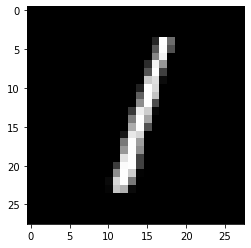

In [ ]:
# visualizing X data
plt.imshow(x_test[2], cmap='gray')
plt.show()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# convert class vectors to binary class matrices
# one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0], y_train[1]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [ ]:
# feature scaling - Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32")/255 

In [ ]:
# Part 2 - Lets make the Multi Layer Perceptrons (MLP)
# https://www.tensorflow.org/guide/keras/sequential_model



from tensorflow.keras import layers

In [ ]:
mlp_classifier = keras.Sequential(
    [
      keras.Input(shape=input_shape),
      layers.Flatten(), # flattens the input
      layers.Dense(num_classes, activation="softmax") # this is a logistic regression in keras
    ]
)

In [ ]:
mlp_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the ANN - basically setting up the optimizer
mlp_classifier.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
# Fitting the ANN to the training data
batch_size = 128
epochs = 15

mlp_classifier.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 12s 23ms/step - loss: 0.7223 - accuracy: 0.8175 - val_loss: 0.3553 - val_accuracy: 0.9100
Epoch 2/15
422/422 [==============================] - 7s 18ms/step - loss: 0.3816 - accuracy: 0.8959 - val_loss: 0.2889 - val_accuracy: 0.9237
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: 0.3339 - accuracy: 0.9084 - val_loss: 0.2648 - val_accuracy: 0.9285
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.3116 - accuracy: 0.9133 - val_loss: 0.2516 - val_accuracy: 0.9320
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2979 - accuracy: 0.9176 - val_loss: 0.2432 - val_accuracy: 0.9323
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2886 - accuracy: 0.9194 - val_loss: 0.2375 - val_accuracy: 0.9365
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2825 - accuracy: 0.9208 - val_loss: 0.2343 - val_accuracy: 0.9345
Epo

In [ ]:
# Part 3 - Making the prediction and evaluating the model

# predicting the test results
score = mlp_classifier.evaluate(x_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.2648 - accuracy: 0.9280


[0.2647802531719208, 0.9279999732971191]

In [ ]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2647802531719208
Test accuracy: 0.9279999732971191


In [ ]:
y_pred = mlp_classifier.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predicted = np.argmax(y_pred,axis=-1)
actual = np.argmax(y_test,axis=-1)

In [ ]:
tab = pd.crosstab(actual,predicted,rownames=['Actual'],colnames=['Predicted'])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

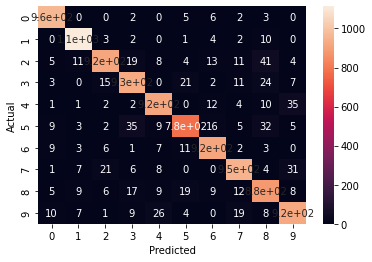

In [ ]:
sns.heatmap(tab, annot=True)

**Model - 2 Convolution Neural Network (CNN)**

In [ ]:
# for cnn, we need to have third dimension (number of channels)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Model parameters
input_shape = (28,28,1) # one channel because of gray scale
num_classes = 10 # 0-9 digits to predict

In [ ]:
cnn_classifier = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, padding='valid', kernel_size=(3, 3), activation="relu"),# params = 288 weights + 32 bias
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
cnn_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
cnn_classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_classifier.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 57s 133ms/step - loss: 0.3691 - accuracy: 0.8891 - val_loss: 0.0848 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 55s 129ms/step - loss: 0.1154 - accuracy: 0.9641 - val_loss: 0.0599 - val_accuracy: 0.9827
Epoch 3/15
422/422 [==============================] - 55s 131ms/step - loss: 0.0869 - accuracy: 0.9739 - val_loss: 0.0460 - val_accuracy: 0.9887
Epoch 4/15
422/422 [==============================] - 54s 128ms/step - loss: 0.0731 - accuracy: 0.9773 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch 5/15
422/422 [==============================] - 53s 126ms/step - loss: 0.0629 - accuracy: 0.9806 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 54s 129ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0341 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 56s 132ms/step - loss: 0.0529 - accuracy: 0.9832 - val_loss: 0.0350 - val_ac